# Assignment 2 in (multivariate machine learning)

### Question 1

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

#https://www.w3schools.com/python/pandas/pandas_dataframes.asp
#https://www.w3schools.com/python/python_ml_multiple_regression.asp

# Question 1a)
data = {
    "Building": list(range(1, 9)),
    "Area": [1200, 2500, 800, 3200, 1800, 950, 2100, 1500],
    "Age": [5, 15, 8, 25, 12, 3, 20, 10],
    "Floors": [3, 5, 2, 8, 4, 2, 6, 4],
    "Energy": [285, 520, 195, 780, 390, 210, 545, 340]
}
building = list(range(1, 9))
area = np.array(data["Area"])
age = np.array(data["Age"])
floors = np.array(data["Floors"])
energy = np.array(data["Energy"])

X = np.array([area, age, floors]).T
y = energy.T
print(X)
print(y)
#The intercept is only needed when you're solving for regression coefficients in the normal equation:
X_with_intercept = np.column_stack([np.ones(len(X)), X])

XTX = X.T @ X
XTy = X.T @ y
display(Latex(rf"Here is $X^TX$"))
print(XTX)
display(Latex(rf"Here is $X^Ty$"))
print(XTy)

display(Latex(rf"The size of $X^TX$ is the following:"))
print(XTX.shape)
display(Latex(rf"The size of $X^Ty$ is the following:"))
print(XTy.shape)

def thetaCoeff(XWIntercept, y):
    return np.linalg.inv(XWIntercept.T @ XWIntercept) @ (XWIntercept.T @ y)

theta = thetaCoeff(X_with_intercept, y)

display(Latex(rf"The $\theta$ coeffecients is:"))
print(theta)

[[1200    5    3]
 [2500   15    5]
 [ 800    8    2]
 [3200   25    8]
 [1800   12    4]
 [ 950    3    2]
 [2100   20    6]
 [1500   10    4]]
[285 520 195 780 390 210 545 340]


<IPython.core.display.Latex object>

[[29372500   211350    71000]
 [  211350     1592      520]
 [   71000      520      174]]


<IPython.core.display.Latex object>

[6850000   49895   16695]


<IPython.core.display.Latex object>

(3, 3)


<IPython.core.display.Latex object>

(3,)


<IPython.core.display.Latex object>

[-6.70900206  0.10019227  1.61238583 51.55755202]


$\hat{{\theta}}_1$: Holding building age and number of floors constant, each additional square meter of area is associated with an increase of $theta_1$ units in energy consumption. Units: energy units per $m^2$.

$\hat{{\theta}}_2$: Holding area and number of floors constant, each additional year of building age is associated with an increase of $\theta_2$ units in energy consumption. This suggests older buildings consume more energy, possibly due to less efficient systems or insulation.


$\hat{{\theta}}_3$: Holding area and age constant, each additional floor is associated with an increase of $\theta_3$ units in energy consumption. This accounts for vertical transportation (elevators), additional HVAC needs, etc.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


Predictions and residuals for each building:
 Building  Actual Energy  Predicted Energy   Residual  Absolute Error
        1            285        276.256311   8.743689        8.743689
        2            520        525.745228  -5.745228        5.745228
        3            195        189.459007   5.540993        5.540993
        4            780        766.676334  13.323666       13.323666
        5            390        399.215927  -9.215927        9.215927
        6            210        196.425919  13.574081       13.574081
        7            545        545.287800  -0.287800        0.287800
        8            340        365.933474 -25.933474       25.933474


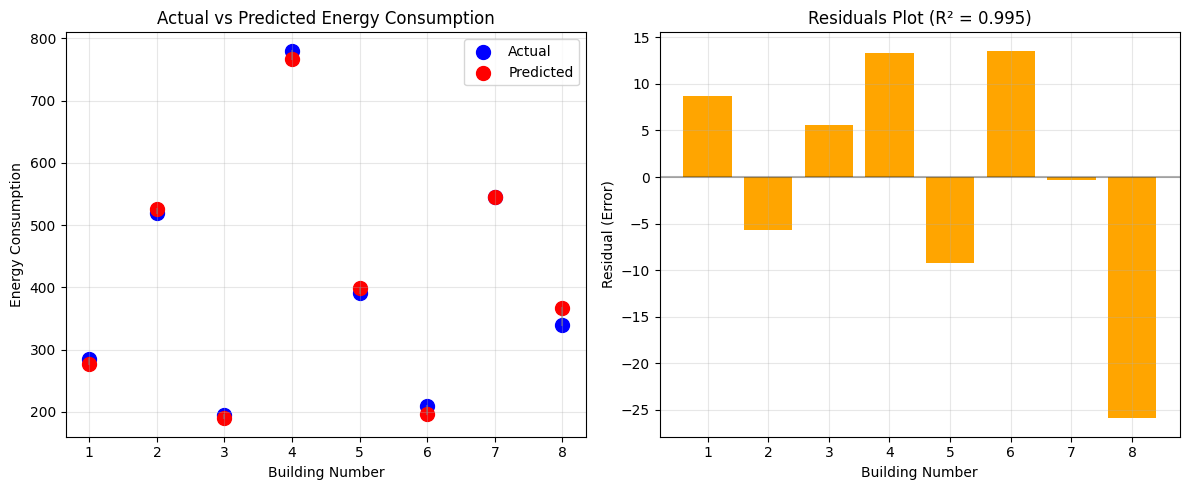

In [28]:
display(Latex(rf"\textbf{{Part (e):}}"))
#Finding the predicted y: based on your theta coeffecients:
y_pred = X_with_intercept @ theta
residuals = y - y_pred
# Calculating the R^2 (coefficient of determination)
SSRes = np.sum(residuals**2)  # Residual Sum of Squares
SSTot = np.sum((y - np.mean(y))**2)  # Total Sum of Squares
RSquared = 1 - (SSRes / SSTot)

display(Latex(rf"$R^2 = {RSquared:.4f}$"))
display(Latex(rf"This means {RSquared*100:.1f}\% of the variance in energy consumption is explained by the model."))

results_df = pd.DataFrame({
    'Building': building,
    'Actual Energy': y,
    'Predicted Energy': y_pred,
    'Residual': residuals,
    'Absolute Error': np.abs(residuals)
})

print("\nPredictions and residuals for each building:")
print(results_df.to_string(index=False))

# Find building with largest prediction error
max_error_idx = np.argmax(np.abs(residuals))
max_error_building = building[max_error_idx]
max_error_value = residuals[max_error_idx]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(building, y, color='blue', label='Actual', s=100)
axes[0].scatter(building, y_pred, color='red', label='Predicted', s=100)
axes[0].plot([building, building], [y, y_pred], color='gray', alpha=0.5)
axes[0].set_xlabel('Building Number')
axes[0].set_ylabel('Energy Consumption')
axes[0].set_title('Actual vs Predicted Energy Consumption')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals plot
axes[1].bar(building, residuals, color='orange')
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1].set_xlabel('Building Number')
axes[1].set_ylabel('Residual (Error)')
axes[1].set_title(f'Residuals Plot (R² = {RSquared:.3f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Question 2 (The inportance of including confounders)

In [29]:
XwArea = np.column_stack([np.ones(len(area)), area])
thetaSimple = np.linalg.inv(XwArea.T @ XwArea) @ (XwArea.T @ energy)

display(Latex(rf"$\hat{{\theta}}_0^{{\text{{simple}}}} = {thetaSimple[0]:.4f}$"))
display(Latex(rf"$\hat{{\theta}}_1^{{\text{{simple}}}} = {thetaSimple[1]:.4f} \, \text{{MWh/m}}^2$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>